In [1]:
###################################################################################################
#
# tests.ipynb 	        (c) Ian Williams, Adnan Khan, Matt McQuinn
#     				    	ianw89@live.com
#
###################################################################################################

# NOTE: Always clear results before checking in a jupyter notebook. This improves diffs.

%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.ndimage.filters import convolve
import matplotlib.pyplot as plt
from testutils import *
import pandas as pd
import cgmbrush.plots.plots as plots

from cgmbrush.cgmbrush import *

%matplotlib inline

In [2]:
# Unit tests for some basic functions
result = halo.Rvir_den(cosmo, 0)
print(result)
assert (math.isclose(result,38235.05346)), "Rvir_den(0) gave unexpected value"

38235.053469659506


In [3]:
# Some test data used below.
a = np.zeros((100, 100))
a[49][48] = 1
a[49][49] = 1
a[49][50] = 1
a[48][49] = 1
a[50][49] = 1

a_single_dot =+ np.zeros((30, 30))
a_single_dot[14][14] = 1

a_with_corner = np.zeros((30, 30))
a_with_corner[14][14] = 1
a_with_corner[14][15] = 1
a_with_corner[14][13] = 1
a_with_corner[15][14] = 1
a_with_corner[13][14] = 1
a_with_corner[1][0] = 1
a_with_corner[1][2] = 1
a_with_corner[1][1] = 1
a_with_corner[2][1] = 1
a_with_corner[0][1] = 1

b_even = np.zeros((10,10))
b_even[4][3] = 1
b_even[4][5] = 1
b_even[4][4] = 1
b_even[3][4] = 1
b_even[5][4] = 1

b_big = np.zeros((80,80))
b_big[39][39] = 1
b_big[40][39] = 1
b_big[38][39] = 1
b_big[39][40] = 1
b_big[39][38] = 1

b_odd = np.zeros((15,15))
b_odd[7][7] = 1
b_odd[7][8] = 1
b_odd[7][6] = 1
b_odd[8][7] = 1
b_odd[6][7] = 1

b_lumpy = np.zeros((20,20))
b_lumpy[11][10] = 0.1154235
b_lumpy[10][11] = 0.111363
b_lumpy[11][11] = 0.4854334

# Resolution 1 equivalent in cgmbrush
a_large = np.random.random((1024,1024))
b_random = np.random.random((20,20))

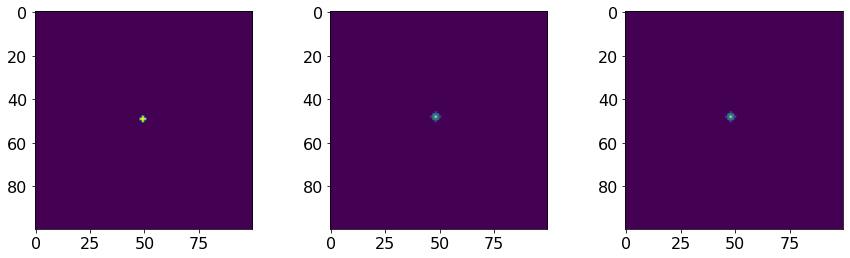

In [4]:
# Proof that our convolution implementation is equivalent to what we did before for even sized filters
c8 = convolve(a, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

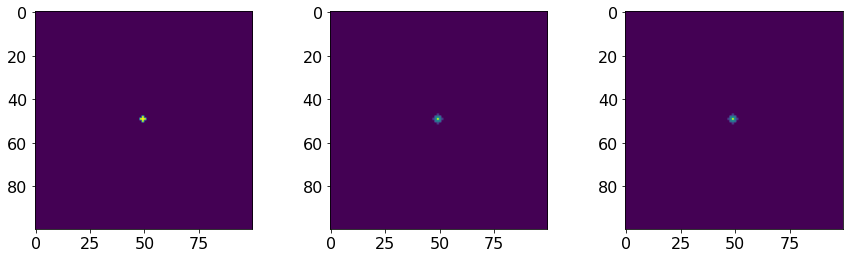

In [5]:
# Proof that our convolution implementation is equivalent to what we did before for odd sized filters
c8 = convolve(a, b_odd, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_odd)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

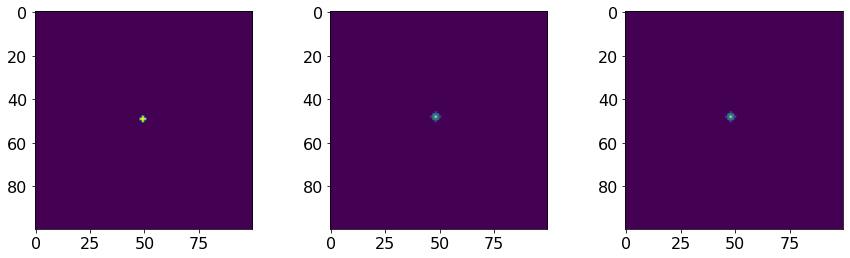

In [6]:
# Proof that our convolution implementation is equivalent to what we did before for large masks
c8 = convolve(a, b_big, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_big)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

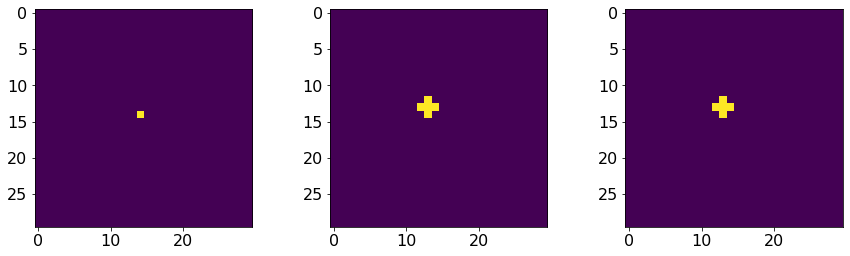

In [7]:
# Proof that our convolution implementation is equivalent to what we did before when stuff is near the corner
c8 = convolve(a_single_dot, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_single_dot, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_single_dot) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

assert (not np.allclose(np.zeros((30,30)), c3)), "should be false"

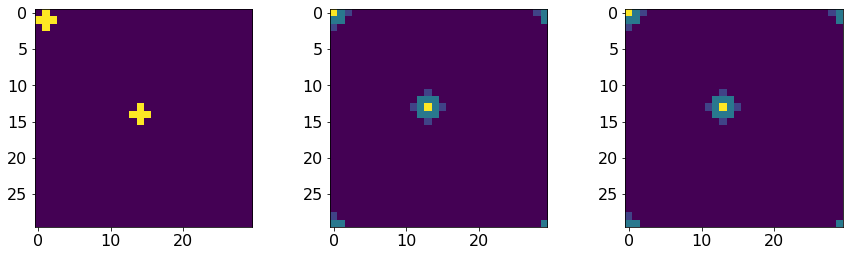

In [8]:
# Proof that our convolution implementation is equivalent to what we did before when stuff is near the corner
c8 = convolve(a_with_corner, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_with_corner, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_with_corner) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

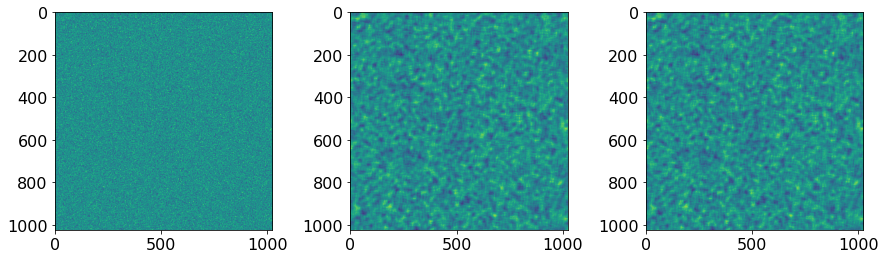

In [9]:
# Proof that our convolution implementation is equivalent to what we did before when stuff both imputs are random values
c8 = convolve(a_large, b_random, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_large, b_random)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_large) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

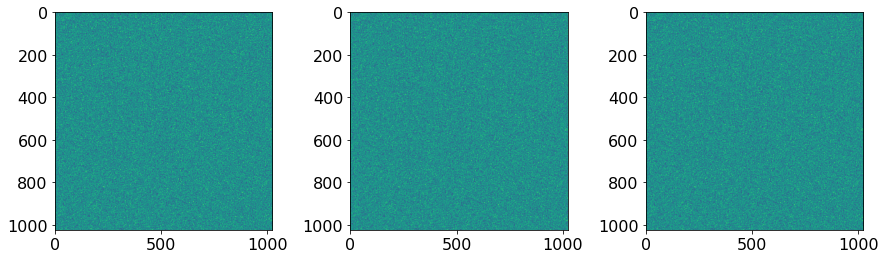

In [10]:
# Proof that my implementation is equivalent to what we did before for lumpy mask
c8 = convolve(a_large, b_lumpy, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_large, b_lumpy)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_large) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

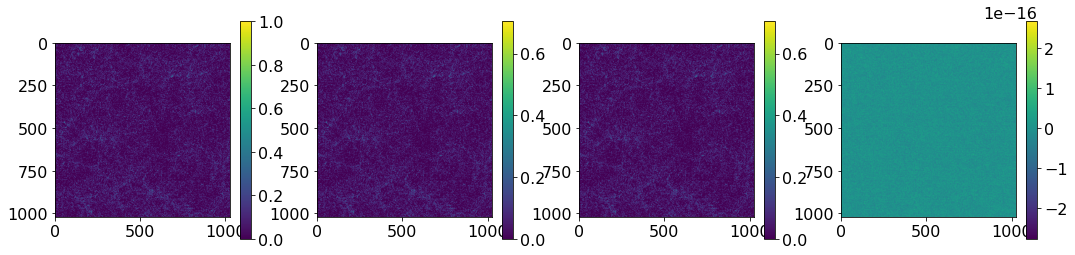

In [11]:
a = np.load('data/problem halos.npy', allow_pickle=True)
b = np.load('data/problem mask.npy', allow_pickle=True)

c8 = convolve(a, b, mode='wrap')
c3 = my_convolve(a, b)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

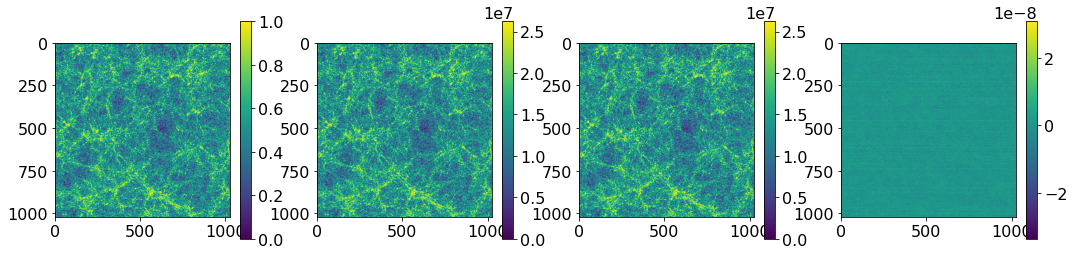

In [12]:
a = np.load('data/problem 2 halos.npy', allow_pickle=True)
b = np.load('data/problem 2 mask.npy', allow_pickle=True)

c8 = convolve(a, b, mode='wrap') 
c3 = my_convolve(a, b)

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

# Fails at 1e-08 level (default) absolute tolerance, but that's ok
assert (np.allclose(c8, c3, atol=1e-07)), "test failed"



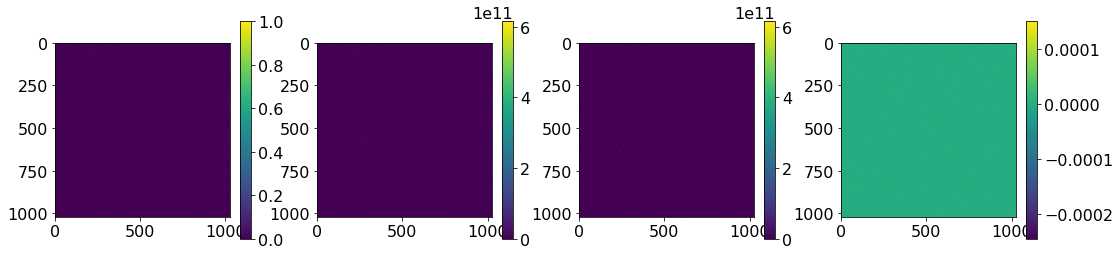

In [13]:
a = np.load('data/problem 3 halos.npy', allow_pickle=True)
b = np.load('data/problem 3 mask.npy', allow_pickle=True)

c8 = convolve(a, b, mode='wrap')
c3 = my_convolve(a, b)

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

# Fails at 1e-08 level (default) absolute tolerance, but it's only because all the numbers are larger in this example
assert (np.allclose(c8, c3, atol=1e-03)), "test failed"



In [14]:
# Regression Testing for end to end convolutions
# The idea here is to baseline some so one can ensure that future changes to the code do not change the results (up to a tolerance)
REWRITE_BASELINES = False
filename_header = "baseline_e2e_%s"
profiles = [TophatProfile(), SphericalTophatProfile(), NFWProfile(), FireProfile(), PrecipitationProfile(), MassDependentProfile(SphericalTophatProfile(rvir_factor=2), NFWProfile(), 1e12)]

for profile in profiles:
    print("Profile: %s" % profile.name)
    config = Configuration(profile, resolution=1, provider=BolshoiProvider())
    config.min_mass = 10**10
    config.max_mass = 10**14.5
    config.log_bins = 30
    config.run()
    check_validity(config) # TODO

    if REWRITE_BASELINES:
        saveResults(filename_header % profile.name, **config.results, folder=TEST_DIR)
    else:
        baseline = force_load_npz(filename_header % profile.name, folder=TEST_DIR)

        # Most important: test the final density grid values
        for i in range(len(config.RS_array)):
            print("summed field ratio =", np.sum(config.get_final_field())/np.sum(baseline['final_density_field']))
            test_pass = np.allclose(config.get_final_field()[i], baseline['final_density_field'][i], rtol=1e-12, atol=1e-3)
            if not test_pass:
                plot_grid_comparison(config.get_final_field()[i], baseline['final_density_field'][i])
                raise Exception("Test failed for profile '{}'. Final density grid has changed at redshift {}.".format(profile.name, config.RS_array[i]))
        
        # TODO
        # Test all the addition masks across all mass bins
        #test_pass = np.allclose(config.get_addition_masks(), baseline['add_masks'], rtol=1e-12, atol=1e-3)
        #if not test_pass:
        #    raise Exception("Test failed for profile '%s'. Addition masks have changed." % profile.name)

        # Not testing histograms, halos subtraction coarse, halo addition field, halos removed field, stacked halo field, virial radii, halo masses.

        if not test_pass:
            raise Exception("Test failed for profile '%s'" % profile.name)

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")


Profile: tophat
Performing calculations for tophat1_256_2022-06-10... 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


done.
summed field ratio = 1.0
Profile: STH
Performing calculations for STH1_256_2022-06-10... done.
summed field ratio = 1.0
Profile: NFW
Performing calculations for NFW1_256_2022-06-10... done.
summed field ratio = 1.0
Profile: fire
Performing calculations for fire1_256_2022-06-10... done.
summed field ratio = 1.0
Profile: precipitation
Performing calculations for precipitation1_256_2022-06-10... done.
summed field ratio = 1.0
Profile: STH_and_NFW_12.0
Performing calculations for STH_and_NFW_12.01_256_2022-06-10... done.
summed field ratio = 1.0


In [15]:
# Test that the convolution code handles empty mass bins correctly
REWRITE_BASELINES = False
filename_header = "baseline_e2e_emptybins"
profile = SphericalTophatProfile()

min_mass = 1E13
max_mass = 1E17 # making it large so we get empty bins
log_bins = 10
provider = BolshoiProvider()
df, bins = create_halo_array_for_convolution(provider.get_halos(0), min_mass, max_mass, log_bins)
print(bins)
assert len(bins) == log_bins, "{} bins were requested, got {}".format(log_bins, len(bins))

config = Configuration(profile, resolution=1, provider=provider)
config.min_mass = min_mass
config.max_mass = max_mass
config.log_bins = log_bins

config.run()
check_validity(config)

if REWRITE_BASELINES:
    saveResults(filename_header, **config.results, folder=TEST_DIR)
else:
    baseline = force_load_npz(filename_header, folder=TEST_DIR)

    # Most important: test the final density grid values
    for i in range(len(config.RS_array)):
        test_pass = np.allclose(config.get_final_field()[i], baseline['final_density_field'][i], rtol=1e-12, atol=1e-3)
        if not test_pass:
            plot_grid_comparison(config.get_final_field()[i], baseline['final_density_field'][i])
            raise Exception("Test failed for profile '{}'. Final density grid has changed at redshift {}.".format(profile.name, config.RS_array[i]))
    
    # Test all the addition masks across all mass bins
    test_pass = np.allclose(config.get_addition_masks(), baseline['add_masks'], rtol=1e-12, atol=1e-3)
    if not test_pass:
        raise Exception("Test failed for profile '%s'. Addition masks have changed." % profile.name)

    # Not testing histograms, halos subtraction coarse, halo addition field, halos removed field, stacked halo field, virial radii, halo masses.

    if not test_pass:
        raise Exception("Test failed for profile '%s'" % profile.name)

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")


[0, 3080, 4069, 4332, 4373, 4375, 4375, 4375, 4375, 4375]
Performing calculations for STH1_256_2022-06-10... done.


/Users/ianw89/Repos/cgm-brush/cgmbrush/test/testutils.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  assert not np.any(np.isnan(config.get_addition_masks())), 'No NaN should appear in results.'


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Regression Testing for make_halo_DM_map
# This is the best baselining test for seeing if the CGM profiles are generating different masks than before; it's faster than the e2e one

REWRITE_BASELINES = False
filename_header = "baseline_add_%s"

provider = BolshoiProvider()
halos = provider.get_halos(0).head(80)
df, bins = create_halo_array_for_convolution(halos, 1E9, 10**(15), 4)
profiles = [TophatProfile(), SphericalTophatProfile(), NFWProfile(), FireProfile(), PrecipitationProfile(), MassDependentProfile(SphericalTophatProfile(rvir_factor=2), NFWProfile(), 1e11)]
#profiles = [SphericalTophatProfile()]

for profile in profiles:
    print("Profile: %s" % profile.name)
    resolution = 2
    results = make_halo_DM_map(provider, df, resolution, bins, profile, 0)

    if REWRITE_BASELINES:
        saveArray(filename_header % profile.name, *results, folder=TEST_DIR)
    else:
        baseline = loadArray(filename_header % profile.name, folder=TEST_DIR)
        test_pass = [np.allclose(results[i], baseline[i], rtol=1e-10, atol=1e-3) for i in [0,1,1,3]] #TODO

        if not test_pass[0]: # zoom in on the region where the 80 chosen halos are
            plot_grid_comparison(results[0][0:128, 0:128], baseline[0][0:128, 0:128])

        if not test_pass[1]:
            print("conv_rad changed.")
            print("New Result: {}".format(results[1]))
            print("Baseline: {}".format(baseline[1]))

        if not test_pass[2]:
            print("Addition masks changed.")
            compare_mask_lists(results[2], baseline[2], resolution)

        if not test_pass[3]:
            print("Mvir_avg changed.")
            print("New Result: {}".format(results[3]))
            print("Baseline: {}".format(baseline[3]))

        if not all(test_pass):
            print(test_pass)
            raise Exception("Test failed for profile '%s'" % profile.name)

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")



In [ ]:
# create_halo_array_for_convolution and add_halos test
# Test that when a bin is empty (repeated values in bins) the code works still.
provider = BolshoiProvider()
halos = provider.get_halos(0).head(80)
df, bins = create_halo_array_for_convolution(halos, 1E9, 10**(15), 4)
print("Halos in use: %s " % len(df))
print(bins)
assert len(bins) == 4, "4 bins dividers (3 bins) were requested"

results = make_halo_DM_map(provider, df, 1, bins, TophatProfile(), 0)

fig, ax = plt.subplots(1,1,figsize=(8, 8))
pos = ax.imshow(results[0][0:80, 0:80])
fig.colorbar(pos, ax=ax)
# No errors or warnings = pass


In [ ]:
# Subtract Halos Regression Tests
REWRITE_BASELINES = False
filename_header = "baseline_subtract_%s"

provider = BolshoiProvider()
halos = provider.get_halos(0)
df, bins = create_halo_array_for_convolution(halos, 1E10, 10**(15), 30)
profiles = [ TophatProfile(), SphericalTophatProfile(), NFWProfile() ]

for profile in profiles:
    print("Profile: %s" % profile.name)
    redshift = 0
    results = subtract_halos(provider, df, bins, profile, redshift, halo)

    if REWRITE_BASELINES:
        saveArray(filename_header % profile.name, results, folder=TEST_DIR)
    else:
        baseline = loadArray(filename_header % profile.name, folder=TEST_DIR)
        test_pass = np.allclose(results, baseline, rtol=1e-15, atol=1e-1)

        if not test_pass:
            plot_grid_comparison(results, baseline)
            raise Exception("Test failed for profile '%s'" % profile.name)

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")

In [ ]:
# Regression Testing for multiple redshifts stacking code
# Requires 3 different density files to run
REWRITE_BASELINES = False
filename_header = "baseline_stacking"
provider=BolshoiProvider()
RS_array = RS_array_gen(1, provider.Lbox)[0:3]
config = Configuration(SphericalTophatProfile(), resolution=1, provider=provider, RS_array=RS_array)
config.seed = 'test seed ensures random numbers generated the same way'
config.min_mass = 10**10
config.max_mass = 9*10**15
config.log_bins = 30
config.run(load_from_files=False) # don't mind loading cached version for this part for this test
check_validity(config)

config.generate_stacked_fields() # want to always run the stacked generation
check_stacked_validity(config) 

if REWRITE_BASELINES:
        stacked_fields = { 'stacked_orig_field': config.stacked_orig_field, 'stacked_removed_field': config.stacked_removed_field, 'stacked_addition_field': config.stacked_addition_field, 'stacked_final_field': config.stacked_final_field }
        saveResults(filename_header, **stacked_fields, folder=TEST_DIR)
else:
    baseline = force_load_npz(filename_header, folder=TEST_DIR)

    test_pass = np.allclose(config.get_stacked_orig_field(), baseline['stacked_orig_field'], rtol=1e-12, atol=1e-3)
    if not test_pass:
        plot_grid_comparison_delta(sum(config.get_stacked_orig_field()), sum(baseline['stacked_orig_field']))
        raise Exception("Stacking test failed. Original density grid has changed.")
    
    test_pass = np.allclose(config.get_stacked_removed_field(), baseline['stacked_removed_field'], rtol=1e-3, atol=1e-3)
    if not test_pass:
        plot_grid_comparison_delta(sum(config.get_stacked_removed_field()), sum(baseline['stacked_removed_field']))
        raise Exception("Stacking test failed. Removed density grid has changed.")
    
    test_pass = np.allclose(config.get_stacked_addition_field(), baseline['stacked_addition_field'], rtol=1e-3, atol=1e-3)
    if not test_pass:
        plot_grid_comparison_delta(sum(config.get_stacked_addition_field()), sum(baseline['stacked_addition_field']))
        raise Exception("Stacking test failed. Additon density grid has changed.")

    test_pass = np.allclose(config.get_stacked_final_field(), baseline['stacked_final_field'], rtol=1e-3, atol=1e-3)
    if not test_pass:
        plot_grid_comparison_delta(sum(config.get_stacked_final_field()), sum(baseline['stacked_final_field']))
        raise Exception("Stacking test failed. Final density grid has changed.")

if REWRITE_BASELINES:
    print("New regression test baselines written. Please set REWRITE_BASELINES to False now.")

In [ ]:
# Tests getting halos from the BolshoiProvider. Will used cached versions. To test importing, delete your bol_halo_xxx.npy files from the var folder.
p = BolshoiProvider()
RS_values = RS_array_gen(1, p.Lbox)
z0 = p.get_halos(0)
zlow = p.get_halos(RS_values[0])
zhigh = p.get_halos(RS_values[8])

assert len(z0) == 8949374
assert len(zlow) == 9328485
assert len(zhigh) == 12847214

In [ ]:
# Test DM_vs_radius
def add_cross(field, center_x, center_y, weight):
    field[center_x][center_y] += weight
    field[center_x - 1][center_y] += weight/3
    field[center_x + 1][center_y] += weight/3
    field[center_x][center_y - 1] += weight/3
    field[center_x][center_y + 1] += weight/3

def add_big_cross(field, center_x, center_y, weight):
    field[center_x][center_y] += weight
    field[center_x - 1][center_y] += weight/3
    field[center_x + 1][center_y] += weight/3
    field[center_x][center_y - 1] += weight/3
    field[center_x][center_y + 1] += weight/3
    field[center_x - 2][center_y] += weight/10
    field[center_x + 2][center_y] += weight/10
    field[center_x][center_y - 2] += weight/10
    field[center_x][center_y + 2] += weight/10
    field[center_x + 1][center_y + 1] += weight/10
    field[center_x - 1][center_y + 1] += weight/10
    field[center_x + 1][center_y - 1] += weight/10
    field[center_x - 1][center_y - 1] += weight/10

class FakeProvider(SimulationProvider): 

    Lbox = 50 / cosmo.h # 50 Mpc/h fake box
    halofieldresolution = 50 # unlike bolshoi making this match the original density field size
    
    def get_density_field(self, redshift: float, resolution: int):
        return np.zeros((50,50)) # 50 x 50 cell original grid

    def get_halos(self, redshift : int) -> pd.DataFrame:
        d = {'x': [3,15,13,30,30], 'y': [3,10,13,37,40], 'Mvir': [10**12, 10**12, 10**12, 10**12, 10**13]} # x,y coords are in Mpc/h like Bolshoi
        df = pd.DataFrame(data=d)
        return df

    def get_z_name(redshift: float) -> str:
        """Gets the shorthand name associated with a given redshift, used in filenames."""
        raise NotImplementedError

#df, bin_markers = create_halo_array_for_convolution(df, 10**11.5, 10**13.1, 3)
#print(bin_markers)
bin_markers = [0,4,5] 
crop_dim = 6
provider = FakeProvider()
df = provider.get_halos(0)
field = provider.get_density_field(0, 1) 

# faked final density field
add_cross(field, df['x'][0], df['y'][0], 300) 
add_cross(field, df['x'][1], df['y'][1], 300)
add_cross(field, df['x'][2], df['y'][2], 300)
add_cross(field, df['x'][3], df['y'][3], 300)
add_big_cross(field, df['x'][4], df['y'][4], 900)

plt.imshow(field) 

# This is what we're trying to test
arr, DM_mass_bin = DM_vs_radius(field, df, crop_dim, bin_markers, provider)
#print(DM_mass_bin)

assert np.all(np.allclose(arr[0], [300, 53.75, 85/6, 40/3, 0])), "Actual result was {}".format(arr[0])
assert np.all(np.allclose(arr[1], [900, 195, 28.75, 50, 0])), "Actual result was {}".format(arr[1])
# If we didn't drop halos near the edge I'd expect this
#assert np.all(np.equal(arr[0], [300, 52.8125, 10.625, 10, 0])), "Actual result was {}".format(arr[0])

series = [(arr, [], 'Test', 'green', '-')]
plots.make_DM_vs_Rad_profiles_plots(series, False, False, 500, 7000, 1, 50, [0,1], None, provider, [10**12, 10**13], [300, 900], "test1")

